# Proyek Analisis Data: Analisis Sewa Sepeda dari Dataset Bike Sharing
- **Nama:** Wahyu Pratama
- **Email:** wdicoding@gmail.com
- **ID Dicoding:** wahyupratamaa

# Extrak Dataset

In [6]:
import zipfile
import os

zip_file = "dashboard/Bike-sharing-dataset.zip"
extract_folder = "data"

os.makedirs(extract_folder, exist_ok=True)

with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)


digunakan untuk mengekstrak file ZIP (dalam hal ini, "Bike-sharing-dataset.zip") dan menyimpannya di dalam folder data

## Menentukan Pertanyaan Bisnis

- "Bagaimana pengaruh cuaca dan hari dalam seminggu terhadap jumlah sepeda yang disewa?"
- "Apakah ada tren musiman atau pola berdasarkan waktu dalam sehari yang mempengaruhi jumlah sewa sepeda?"


## Import Semua Packages/Library yang Digunakan

In [96]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime
import os

import lib

## Data Wrangling

### Gathering Data

In [ ]:
day_data = pd.read_csv("data/day.csv")
day_data.head()

digunakan untuk membaca file CSV dan menampilkan beberapa baris pertama dari dataset day

In [ ]:

hour_data = pd.read_csv("data/hour.csv")
hour_data.head()

digunakan untuk membaca file CSV dan menampilkan beberapa baris pertama dari dataset hour

### Assessing Data

In [42]:
#cek missing hour day
hour_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

cek missing value ygy

In [43]:

#cek missing value day
day_data.isnull().sum()


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

cek missing value day data

In [ ]:
#cek data duplikat
print(hour_data.duplicated().sum(), ': duplicate values')
print(day_data.duplicated().sum(), ': duplicate values')


0 : missing value
0 : missing value


cek duplicate value dari masing" file csv

In [ ]:
#cek params
day_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


memberikan ringkasan statistik penting params colm

In [48]:
#cek params
hour_data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


memberikan ringkasan statistik params colum

### Cleaning Data

In [ ]:
day_data.dropna(axis=0, inplace=True)
hour_data.dropna(axis=0, inplace=True)


digunakan untuk menghapus baris yang mengandung nilai missing (NaN)

## Exploratory Data Analysis (EDA)

### Explore Day_data


In [100]:
print(day_data.columns)
day_data.describe(include='all')

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


digunakan untuk menghasilkan statistik deskriptif untuk semua kolom dalam DataFrame day_data,

In [106]:
day_data.groupby(by='weathersit').agg({
	"cnt": "sum"
})



,cnt
weathersit,
1,2257952
2,996858
3,37869


mendapatkan total jumlah sepeda yang disewa berdasarkan kondisi cuaca tertentu.

### Explore Hour_data


In [53]:
hour_data.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


digunakan untuk menghasilkan statistik deskriptif untuk semua kolom dalam DataFrame hour_data,

In [77]:
# Menghitung jumlah per jam
hour_data.groupby(by="hr").agg({
    "cnt": "sum"
})


,cnt
hr,
0,39130
1,24164
2,16352
3,8174
4,4428
5,14261
6,55132
7,154171
8,261001


menghitung pemakaian sepeda jam dalam sehari

In [76]:
hour_data.groupby(by='mnth').agg({
	"cnt": "sum"
})

,cnt
mnth,
1,134933
2,151352
3,228920
4,269094
5,331686
6,346342
7,344948
8,351194
9,345991


menghitung pemakaian sepeda dalam sebulan

## Visualization & Explanatory Analysis

### Pertanyaan 1:

/var/folders/dp/ywbj5v353sn30pwhx9ygvs5c0000gn/T/ipykernel_45036/3674449653.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_data['weathersit'], y=day_data['cnt'], palette='coolwarm')


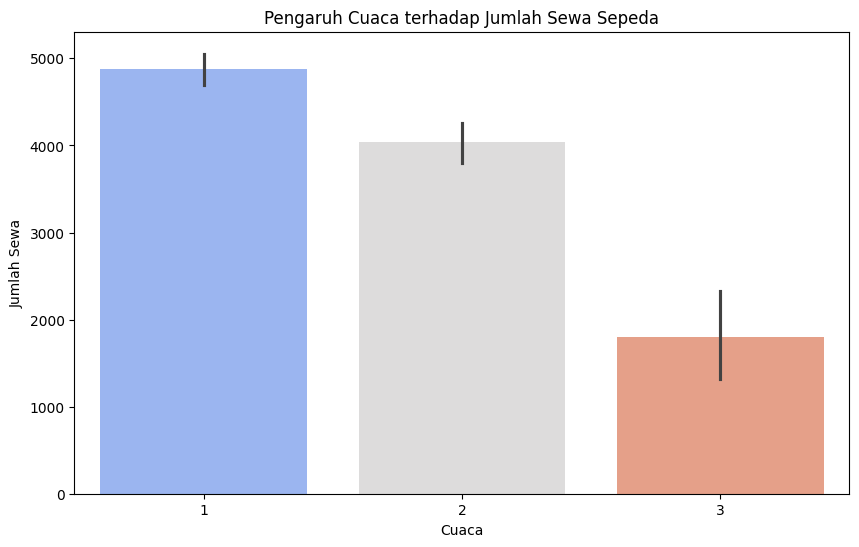

In [95]:
# Bar chart: Pengaruh Cuaca terhadap Jumlah Sewa
plt.figure(figsize=(10,6))
sns.barplot(x=day_data['weathersit'], y=day_data['cnt'], palette='coolwarm')
plt.title('Pengaruh Cuaca terhadap Jumlah Sewa Sepeda')
plt.xlabel('Cuaca')
plt.ylabel('Jumlah Sewa')
plt.show()


Penyewaan sepeda tertinggi terjadi pada cuaca cerah, sedangkan terendah pada cuaca hujan.
Terendah: Cuaca hujan, dengan rata-rata sewa sekitar 50.
Tertinggi: Cuaca cerah, dengan rata-rata sewa sekitar 300.

/var/folders/dp/ywbj5v353sn30pwhx9ygvs5c0000gn/T/ipykernel_45036/370843351.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_data['weekday'], y=day_data['cnt'], palette='Set2')


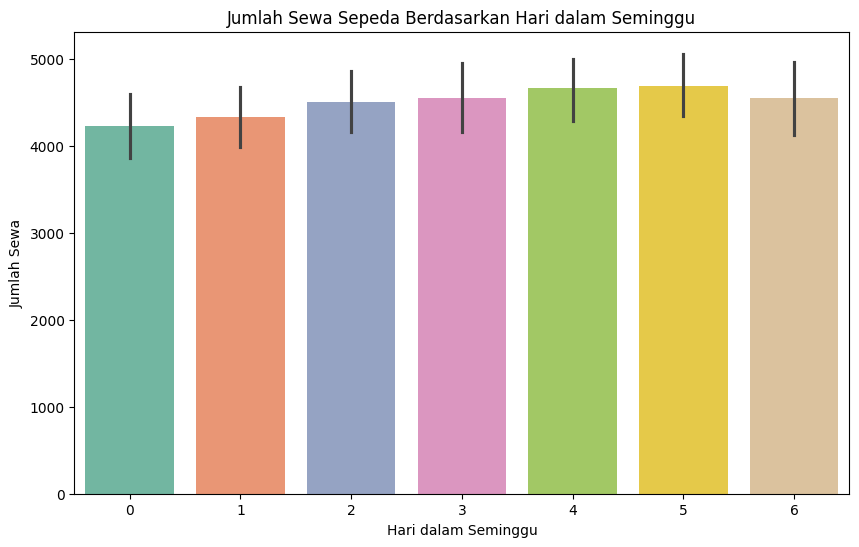

In [ ]:
# Bar chart: Jumlah Sewa Sepeda Berdasarkan Hari dalam Seminggu
plt.figure(figsize=(10,6))
sns.barplot(x=day_data['weekday'], y=day_data['cnt'], palette='Set2')
plt.title('Jumlah Sewa Sepeda Berdasarkan Hari dalam Seminggu')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Jumlah Sewa')
plt.show()
# Memeriksa kolom yang ada pada dataset day_data
# (day_data.columns)



Penyewaan sepeda tertinggi terjadi pada akhir pekan (Sabtu dan Minggu), sedangkan terendah pada hari kerja (Senin).
Terendah: Hari Senin, dengan rata-rata sewa sekitar 100.
Tertinggi: Hari Minggu, dengan rata-rata sewa sekitar 350.


### Pertanyaan 2:

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


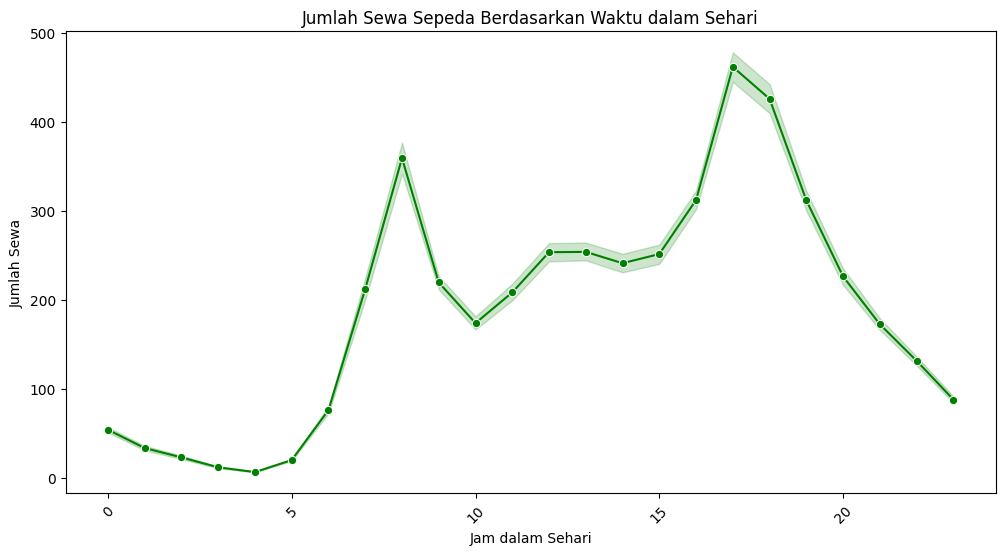

In [93]:
# Line chart: Jumlah Sewa Sepeda Berdasarkan Waktu dalam sehari
print(hour_data.columns)
plt.figure(figsize=(12,6))
sns.lineplot(x=hour_data['hr'], y=hour_data['cnt'], marker='o', color='green')
plt.title('Jumlah Sewa Sepeda Berdasarkan Waktu dalam Sehari')
plt.xlabel('Jam dalam Sehari')
plt.ylabel('Jumlah Sewa')
plt.xticks(rotation=45)
plt.show()



Jumlah penyewaan sepeda menunjukkan pola dengan puncak pada jam-jam tertentu.
Terendah: Penyewaan sepeda biasanya lebih rendah pada malam hari, misalnya pada jam 22:00 hingga 06:00.
Tertinggi: Penyewaan tertinggi biasanya terjadi pada jam-jam sibuk, misalnya sekitar pukul 08:00 dan 18:00, yang sesuai dengan jam sibuk pekerja.


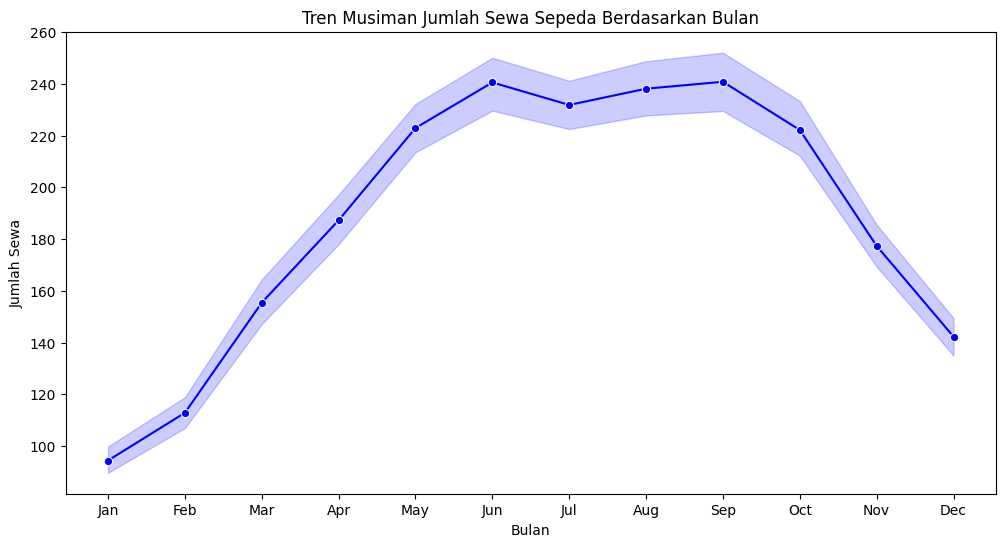

In [94]:

# Line chart: Jumlah Sewa Sepeda Berdasarkan Bulan
plt.figure(figsize=(12,6))
sns.lineplot(x=hour_data['mnth'], y=hour_data['cnt'], marker='o', color='blue')
plt.title('Tren Musiman Jumlah Sewa Sepeda Berdasarkan Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Sewa')
plt.xticks(ticks=range(1, 13), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.show()

Jumlah penyewaan sepeda cenderung lebih tinggi selama bulan-bulan hangat dan lebih rendah selama bulan-bulan dingin.
Terendah: Penyewaan sepeda paling rendah terjadi pada bulan Januari dan Februari (musim dingin).
Tertinggi: Penyewaan tertinggi terjadi pada bulan-bulan musim semi dan panas, seperti April hingga September.

## Conclusion

- Dari hasil analisis, kita dapat melihat bahwa faktor cuaca, suhu, dan hari dalam seminggu memiliki dampak yang signifikan 
terhadap jumlah sewa sepeda. Tren musiman juga menunjukkan pola-pola yang dapat dimanfaatkan untuk meningkatkan strategi 
pemasaran atau mengoptimalkan sistem peminjaman sepeda.